# Initialize global variables

In [3]:
import random
import os
import glob
from tqdm.notebook import tqdm_notebook # for a progress bar
from time import perf_counter_ns
import gc
# go to directory with test files
os.chdir('prim')

In [3]:
def parse_input_file_prim(file_address):
    vertices = set()
    edges = [] 
    with open(glob.glob(file_address)[0]) as f:
        lines = f.readlines()
    num_V_E = [int(x) for x in lines[0].split()]
    lines = lines[1:]
    for line in lines:
        x = line.split()
        vertices.add(x[0])
        vertices.add(x[1])
        edges.append((int(x[2]), x[0], x[1])) #heapq ranks tuples based on the first value!
    vertices = list(vertices)
    return vertices, edges, num_V_E

In [4]:
graphs_prim = []
for file in tqdm_notebook(os.listdir()):
    vertices, edges, num_V_E = parse_input_file_prim(file) 
    graphs_prim.append((num_V_E, vertices, edges))

  0%|          | 0/68 [00:00<?, ?it/s]

# Prim 

In [5]:
import heapq
def Prim(vertices, edges):
    S = set() #keep track of touched vertices
    V = set(vertices)
    S.add(vertices[0])
    MST = [] #our MST, a list of (w, u, v)
    not_S = set(vertices[1:]) #untouched vertices
    while not S == V:
        light_edge = find_lightest_edge(S, not_S, edges)
        MST.append(light_edge) #populate our MST on each iteration
        S.add(light_edge[1]) #add only the Vertices
        S.add(light_edge[2]) 
        not_S = populate_set(vertices, S)
    return MST

def populate_set(vertices, Set1):
    # make set2 and set1 mutually disjoint
    Set2 = set()
    for v in vertices:
        if not v in Set1:
            Set2.add(v)
    return Set2
    
def find_lightest_edge(Set1, Set2, SetGlobal):
    heap = []
    for (w, u, v) in SetGlobal:
        if (u in Set1 and v in Set2) or (v in Set1 and u in Set2):
            heapq.heappush(heap,(w, u, v))
    return heap[0]

def MSTweight(MST):
    sum = 0
    for (w ,u ,v) in MST:
        sum = sum + w
    return sum

In [6]:
def get_time_prim(vertices, edges):
    gc.disable() #disable garbage collector
    start_time = perf_counter_ns() 
    theMST = Prim(vertices, edges)
    end_time = perf_counter_ns()
    gc.enable()
    print("Running Time was: ", end_time-start_time)
    print("The Weight of MST is: ", MSTweight(theMST))
    return (end_time-start_time)

In [7]:
results = []
# make a progress bar, print results
for i in tqdm_notebook(range(len(graphs_prim))):
    print("|V| = ", graphs_prim[i][0][0], " |E| = ", graphs_prim[i][0][1])
    results.append((graphs_prim[i][0][0], get_time_prim(graphs_prim[i][1], graphs_prim[i][2])))

  0%|          | 0/68 [00:00<?, ?it/s]

|V| =  40  |E| =  52
Running Time was:  571900
The Weight of MST is:  -97121
|V| =  40  |E| =  51
Running Time was:  346500
The Weight of MST is:  -64386
|V| =  40  |E| =  55
Running Time was:  346400
The Weight of MST is:  -41633
|V| =  80  |E| =  103
Running Time was:  1239300
The Weight of MST is:  -240676
|V| =  80  |E| =  110
Running Time was:  1487600
The Weight of MST is:  -139945
|V| =  80  |E| =  107
Running Time was:  1385500
The Weight of MST is:  -194537
|V| =  80  |E| =  109
Running Time was:  1315100
The Weight of MST is:  -185494
|V| =  100  |E| =  134
Running Time was:  2483500
The Weight of MST is:  -194931
|V| =  100  |E| =  129
Running Time was:  1952000
The Weight of MST is:  -184735
|V| =  100  |E| =  131
Running Time was:  1990500
The Weight of MST is:  -217244
|V| =  10  |E| =  10
Running Time was:  24000
The Weight of MST is:  -7430
|V| =  100  |E| =  125
Running Time was:  1939200
The Weight of MST is:  -183953
|V| =  200  |E| =  260
Running Time was:  8082000


[(10, 24000), (10, 33500), (10, 29400), (10, 27900), (20, 91200), (20, 5147100), (20, 152800), (20, 92200), (40, 571900), (40, 346500), (40, 346400), (40, 550600), (80, 1239300), (80, 1487600), (80, 1385500), (80, 1315100), (100, 2483500), (100, 1952000), (100, 1990500), (100, 1939200), (200, 8082000), (200, 7891200), (200, 7603400), (200, 7953400), (400, 34503800), (400, 33490400), (400, 32684800), (400, 34072400), (800, 136868000), (800, 135395600), (800, 130161100), (800, 133434400), (1000, 209607900), (1000, 213754400), (1000, 204260800), (1000, 218018100), (2000, 891738600), (2000, 898465300), (2000, 889159400), (2000, 910125800), (4000, 3527424100), (4000, 3595979500), (4000, 3625231700), (4000, 3661937500), (8000, 14946859200), (8000, 14723164800), (8000, 14599143700), (8000, 15127928900), (10000, 23383172800), (10000, 22737335600), (10000, 22808731300), (10000, 23072231600), (20000, 106005614600), (20000, 105631635500), (20000, 101904117700), (20000, 103504139900), (40000, 5572

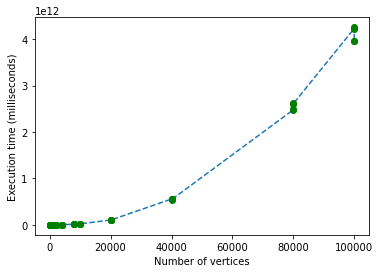

In [8]:
import matplotlib.pyplot as plt
results = sorted(results,key=lambda results: results[0])
x_val = [x[0] for x in results]
y_val = [x[1] for x in results]

# build the plot
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

In [9]:
plt.show()

# Parse input

In [4]:
def parse_input_file_kruskal(file_address):
    # store vertices and edges in separate sets
    vertices = set()
    edges = [] 
    # read file
    with open(glob.glob(file_address)[0]) as f:
        lines = f.readlines()
    num_V_E = [int(x) for x in lines[0].split()]
    lines = lines[1:]
    # populate sets
    for line in lines:
        x = line.split()
        vertices.add(x[0])
        vertices.add(x[1])
        edges.append((x[0], x[1], int(x[2])))
    vertices = list(vertices)
    return vertices, edges, num_V_E

In [5]:
graphs_kruskal = []
for file in tqdm_notebook(os.listdir()):
    vertices, edges, num_V_E = parse_input_file_kruskal(file) 
    graphs_kruskal.append((num_V_E, vertices, edges))

  0%|          | 0/68 [00:00<?, ?it/s]

In [6]:
# Graph object
class Graph:
    def __init__(self, V, E, num_V, num_E):
        self.V = V
        self.E = E
        self.num_V = num_V
        self.num_E = num_E

# Kruskal Efficient

In [13]:
class Kruskal_Efficient:
    def __init__(self, graph):
        self.graph = graph
        self.sets = {}
        self.MST = [] # Minimum Spanning Tree
        
    def make_sets(self):
        # initialize sets
        for v in self.graph.V:
            self.sets[v] = [v]
    
    def check_cycle(self, u, v):
        # check cycle by comparing sets
        cycle = False
        for sett in list(self.sets.values()):
            if u in sett:
                if v in sett:
                    cycle = True
                else:
                    sett.append(v)
                    if (v in self.sets.keys()) and (len(self.sets[v]) > 1):
                        res = self.sets[v]
                        sett.extend(res[1:])
                        self.sets.pop(v)
        return cycle
            

    def execute(self):        
        # sorting based on the weight of the edges    
        E = sorted(self.graph.E, key = lambda m: m[2])        
        self.make_sets()
        # for each edge, check if it doesn't violate the invariant
        for e in E:
            u, v, w = e           
            if not self.check_cycle(u, v):
                if (len(self.MST) < int(self.graph.num_E)):
                    self.MST.append(e)
        return self.MST

In [20]:
def get_time_kruskal(vertices, edges, num_V_E):
    graph = Graph(vertices, edges, num_V_E[0], num_V_E[1]) # initialize graph
    algo = Kruskal_Efficient(graph) # initialize algorithm object
    gc.disable() # disable garbage collector
    start_time = perf_counter_ns()
    result = algo.execute()
    end_time = perf_counter_ns()
    gc.enable()
    print("Running Time was: ", end_time-start_time)
    return (end_time-start_time)

In [21]:
results_k_efficient = []
# with a progress bar, execute the algorithm
for i in tqdm_notebook(range(len(graphs_kruskal))):
    print("|V| = ", graphs_kruskal[i][0][0], " |E| = ", graphs_kruskal[i][0][1])
    results_k_efficient.append((graphs_kruskal[i][0][0], get_time_kruskal(graphs_kruskal[i][1], graphs_kruskal[i][2], graphs_kruskal[i][0])))

  0%|          | 0/68 [00:00<?, ?it/s]

|V| =  40  |E| =  52
Running Time was:  314300
The Weight of MST is:  -97121
|V| =  40  |E| =  51
Running Time was:  307300
The Weight of MST is:  -64386
|V| =  40  |E| =  55
Running Time was:  242900
The Weight of MST is:  -41633
|V| =  80  |E| =  103
Running Time was:  795000
The Weight of MST is:  -240676
|V| =  80  |E| =  110
Running Time was:  828000
The Weight of MST is:  -139945
|V| =  80  |E| =  107
Running Time was:  1121600
The Weight of MST is:  -194537
|V| =  80  |E| =  109
Running Time was:  783600
The Weight of MST is:  -185494
|V| =  100  |E| =  134
Running Time was:  1367100
The Weight of MST is:  -194931
|V| =  100  |E| =  129
Running Time was:  1389600
The Weight of MST is:  -184735
|V| =  100  |E| =  131
Running Time was:  1160900
The Weight of MST is:  -217244
|V| =  10  |E| =  10
Running Time was:  30100
The Weight of MST is:  -7430
|V| =  100  |E| =  125
Running Time was:  1073700
The Weight of MST is:  -183953
|V| =  200  |E| =  260
Running Time was:  4117500
The

[(10, 30100), (10, 37800), (10, 38200), (10, 77200), (20, 86600), (20, 115900), (20, 92600), (20, 94000), (40, 314300), (40, 307300), (40, 242900), (40, 352300), (80, 795000), (80, 828000), (80, 1121600), (80, 783600), (100, 1367100), (100, 1389600), (100, 1160900), (100, 1073700), (200, 4117500), (200, 4033000), (200, 4155600), (200, 4197900), (400, 16837600), (400, 16215100), (400, 15222400), (400, 15251300), (800, 62482600), (800, 64100100), (800, 61568300), (800, 63601000), (1000, 95166600), (1000, 97393600), (1000, 98970100), (1000, 96134100), (2000, 405935200), (2000, 406663000), (2000, 406176000), (2000, 418425400), (4000, 1644818700), (4000, 1645803200), (4000, 1651764700), (4000, 1663303200), (8000, 6653808500), (8000, 6638481500), (8000, 6804117300), (8000, 6644977200), (10000, 10374184800), (10000, 10260758700), (10000, 10362527700), (10000, 10361383400), (20000, 44795341600), (20000, 45190369400), (20000, 45116802000), (20000, 45606853700), (40000, 266453271100), (40000, 29

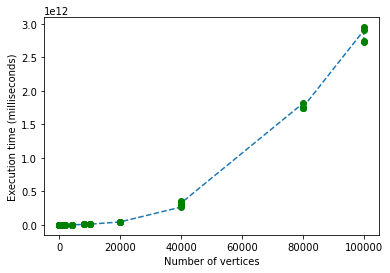

In [22]:
import matplotlib.pyplot as plt
results_k_efficient = sorted(results_k_efficient, key=lambda results: results[0])
x_val = [x[0] for x in results_k_efficient]
y_val = [x[1] for x in results_k_efficient]

# build the plot
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

# Kruskal Naive

In [7]:
class Kruskal_Naive:
    def __init__(self, graph):
        self.graph = graph
        self.MST = {} # adjacency list
        self.MST_edges = [] # edges
        
    def dfs_cycle(self, visited, G, v, parent):   
        # using DFS traversal find a cycle
        visited.add(v)
        for neighbour in G[v]:
            if neighbour != parent and neighbour in visited:
                return True
            elif neighbour != parent:            
                return self.dfs_cycle(visited, G, neighbour, v)
        return False
    
    def check_cycle(self, edge):
        u, v, w = edge
        if (u in self.MST and v in self.MST[u]) or (v in self.MST and u in self.MST[v]):
            return True
        visited = set()
        # create a graph to check the edge addition
        MST_with_e = {}
        # add target edge
        MST_with_e[u] = [v]
        MST_with_e[v] = [u]
        # populate with MST edges
        for i in range(len(self.MST_edges)):
            a, b, w = self.MST_edges[i]
            if a not in MST_with_e:
                MST_with_e[a] = []
            if b not in MST_with_e:
                MST_with_e[b] = []
            MST_with_e[a].append(b)
            MST_with_e[b].append(a)
        
        return self.dfs_cycle(visited, MST_with_e, u, '-1')
    
    def execute(self):
        # sorting based on the weight of the edges    
        E = sorted(self.graph.E, key = lambda m: m[2])   
        # for each edge, check if it doesn't violate the invariant
        for e in E:
            if not self.check_cycle(e):
                self.MST_edges.append(e)
                if e[0] not in self.MST:
                    self.MST[e[0]] = []
                self.MST[e[0]].append(e[1])
        return self.MST_edges

In [8]:
def get_time_kruskal(vertices, edges, num_V_E):
    graph = Graph(vertices, edges, num_V_E[0], num_V_E[1]) # initialize graph
    algo = Kruskal_Naive(graph) # initialize algorithm object
    gc.disable() # disable garbage collector
    start_time = perf_counter_ns()
    full_edges  = algo.execute()
    end_time = perf_counter_ns()
    gc.enable()
    #print("Running Time was: ", end_time-start_time)
    #print(full_edges)
    #print("Total weight: {}".format(sum([e[2] for e in full_edges])))
    return (end_time-start_time)

In [ ]:
results_k_naive = []
# with a progress bar, execute the algorithm
for i in tqdm_notebook(range(len(graphs_kruskal[:10]))):
    #print("|V| = ", graphs_kruskal[i][0][0], " |E| = ", graphs_kruskal[i][0][1])
    results_k_naive.append((graphs_kruskal[i][0][0], get_time_kruskal(graphs_kruskal[i][1], graphs_kruskal[i][2], graphs_kruskal[i][0])))

  0%|          | 0/68 [00:00<?, ?it/s]

[(10, 39600), (10, 58100), (10, 54300), (10, 52200), (20, 156300), (20, 246100), (20, 262400), (20, 121900), (40, 736800), (40, 599800), (40, 617200), (40, 779500), (80, 1991600), (80, 2168800), (80, 2121700), (80, 2227900), (100, 3273700), (100, 3532100), (100, 3308600), (100, 2970400), (200, 13669900), (200, 14320900), (200, 12150400), (200, 12823800), (400, 54698400), (400, 53536400), (400, 52089100), (400, 54135600), (800, 212056700), (800, 209625000), (800, 200457600), (800, 206821200), (1000, 330721800), (1000, 335730900), (1000, 320822300), (1000, 339559900), (2000, 1381036200), (2000, 1363782100), (2000, 1370117900), (2000, 1394933200), (4000, 5512970500), (4000, 5663087000), (4000, 5678547200), (4000, 5668277400), (8000, 22492685100), (8000, 22320784500), (8000, 22107688300), (8000, 22111098900), (10000, 34454909000), (10000, 35131162400), (10000, 34936482400), (10000, 34909513500), (20000, 157748629400), (20000, 152819958100), (20000, 154456007100), (20000, 150680240600), (40

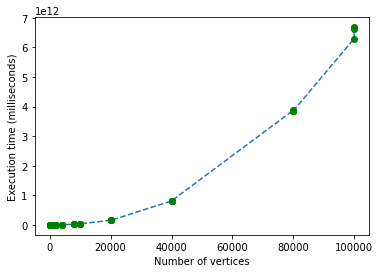

In [12]:
import matplotlib.pyplot as plt
results_k_naive = sorted(results_k_naive, key=lambda results: results[0])
print(results_k_naive)
x_val = [x[0] for x in results_k_naive]
y_val = [x[1] for x in results_k_naive]

# buil
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

In [13]:
plt.show()